<h1>Data analysis report for bike company</h1>
<i>Konsta Nyman</i>

In [104]:
# imports

import pandas as P
import scipy.stats as S
import numpy as N

<h2>Data preparation</h2>

In [105]:
# loading data file

bikes = P.read_csv('./project_data/bikes.data',
                   # field separator character
                   sep=",",
                   # missing value characters
                   na_values=["?"],
                   # no row names
                   index_col=False,
                   # first row as column names
                   header=0,
                   # quote character
                   quotechar="'")
bikes

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1769,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1770,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1771,season,0.00,7,TORI,TORI,61.0,0,1,0.0,0.0
1772,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


<p>Data file is now loaded and looks clean at first glance. The variables match the documentation provided.</p>

<h4>Checking the variables</h4>

In [106]:
# checking data types

bikes.dtypes

ticket               object
cost                float64
month                 int64
location_from        object
location_to          object
duration            float64
distance              int64
assistance            int64
energy_used         float64
energy_collected    float64
dtype: object

In [107]:
# overall description of dataframe

bikes.describe()

,cost,month,duration,distance,assistance,energy_used,energy_collected
count,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000,1774.000000
mean,0.491234,7.233371,671.323563,2460.067644,0.916009,17.399493,5.639290
std,4.127344,1.720351,1141.708627,2352.529305,0.277452,17.194463,6.379593
min,0.000000,4.000000,2.000000,-3380.000000,0.000000,0.000000,0.000000
25%,0.000000,6.000000,245.250000,910.000000,1.000000,1.425000,0.600000
50%,0.050000,7.000000,546.500000,2030.000000,1.000000,14.350000,3.900000
75%,0.550000,9.000000,877.750000,3605.000000,1.000000,26.900000,8.325000
max,100.000000,10.000000,25614.000000,20770.000000,1.000000,144.900000,56.400000


<p>From here we can see that at least column 'distance has some issues because of the negative min-value.</p>
<p>Also, the maximum value of column cost is suspicious.</p>

In [108]:
# find null values

bikes.isnull().sum()

ticket              0
cost                0
month               0
location_from       0
location_to         0
duration            0
distance            0
assistance          0
energy_used         0
energy_collected    0
dtype: int64

<p>No null values</p>

In [109]:
# check odditites in categorical variables

print(bikes['ticket'].unique())
print(N.sort(bikes['month'].unique()))
print(N.sort(bikes['location_from'].unique()))
print(N.sort(bikes['location_to'].unique()))
print(bikes['assistance'].unique())

['single' 'savonia' 'season']
[ 4  5  6  7  8  9 10]
['KAUPPAKATU' 'KEILANKANTA' 'KYS' 'MICROTEKNIA' 'NEULAMÄKI' 'PIRTTI'
 'PUIJONLAAKSO' 'SATAMA' 'TASAVALLANKATU' 'TORI']
['KAUPPAKATU' 'KEILANKANTA' 'KYS' 'MICROTEKNIA' 'NEULAMÄKI' 'PIRTTI'
 'PUIJONLAAKSO' 'SATAMA' 'TASAVALLANKATU' 'TORI']
[1 0]


<p>Everything looks fine in these columns</p>

<Axes: ylabel='Frequency'>

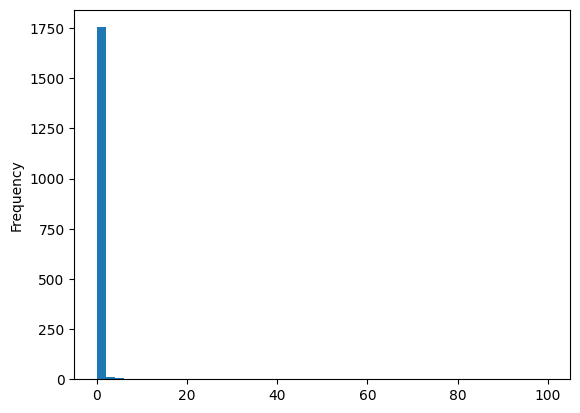

In [110]:
# check for oddities in numeric variables

# histogram of column 'cost'

bikes.cost.plot.hist(bins=50)

<p>Here we see that most instances are close to 0 but histogram range is until 100 and we remember that max-value of cost was 100 in the dataframe description. We'll look into this later.</p>

<Axes: title={'center': 'Duration v. distance'}, xlabel='Duration (s)', ylabel='Distance (m)'>

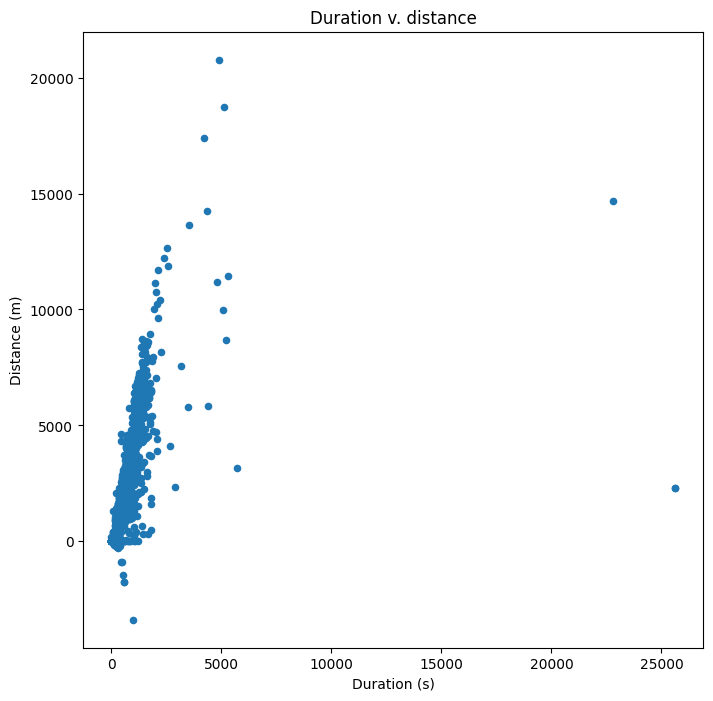

In [111]:
# lets create a scatter plot of columns 'duration' and 'distance'

bikes.plot.scatter('duration', 'distance',
                   title="Duration v. distance",
                   xlabel="Duration (s)",
                   ylabel="Distance (m)",
                   figsize=(8,8))

<p>Here we can see that some values of 'distance' are negative which we already knew and have to fix. They seem to follow the trend of duration so we can assume that they are fine if we turn them to positive values. We also see two clear outliers.</p>

<Axes: title={'center': 'Duration v. cost'}, xlabel='Duration (s)', ylabel='Cost (€)'>

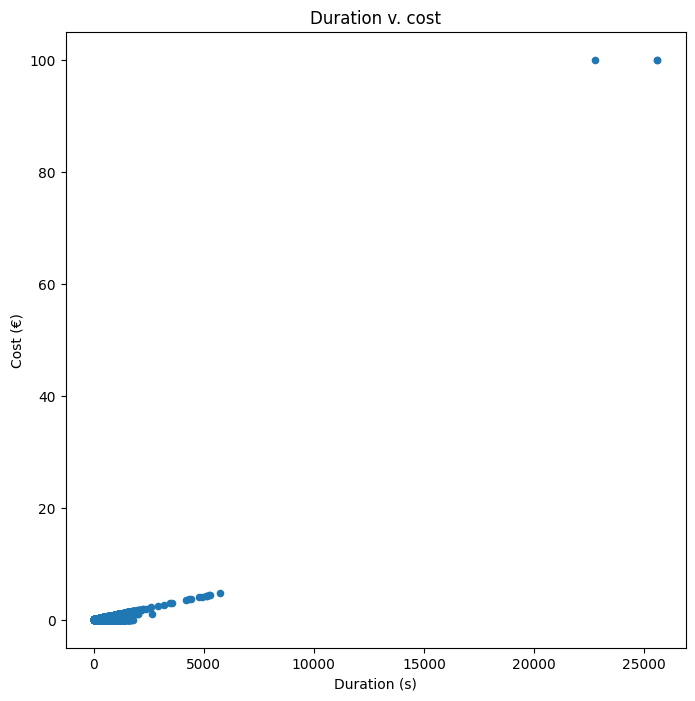

In [112]:
# lets create a scatter plot of columns 'duration' and 'cost'

bikes.plot.scatter('duration', 'cost',
                   title="Duration v. cost",
                   xlabel="Duration (s)",
                   ylabel="Cost (€)",
                   figsize=(8,8))

<p>We see the same two outliers in both cost and duration so we can confidently mark them as technical faults and can clean them up.</p>

<p>Cost being 0 is okay, because ticket types 'season' and 'savonia' don't register payment.</p>

<p>There was also a mention in the documentation that there are observations where customers only tried the renting system and didn't ride the bike. So we can clean up all observations where distance is 0.</p>

<h4>Cleaning dataframe</h4>

In [113]:
# removing two observations with technical problems

bikes = bikes[bikes['cost'] != 100]

In [114]:
# fixing the negative values in the 'distance' column

bikes.loc[:, 'distance'] = bikes['distance'].abs()

In [115]:
# remove all rows where distance is 0

bikes = bikes[bikes['distance'] != 0]

In [116]:
# resetting the indexes of the dataframe

bikes = bikes.reset_index(drop=True)
bikes

,ticket,cost,month,location_from,location_to,duration,distance,assistance,energy_used,energy_collected
0,single,0.35,9,MICROTEKNIA,PUIJONLAAKSO,411.0,2150,1,19.0,2.7
1,single,1.20,5,SATAMA,KEILANKANTA,1411.0,7130,1,53.8,15.3
2,savonia,0.00,9,TASAVALLANKATU,NEULAMÄKI,1308.0,5420,1,43.0,9.9
3,savonia,0.00,10,TORI,KAUPPAKATU,1036.0,1180,1,6.5,2.1
4,single,0.30,9,TORI,TORI,319.0,1120,1,13.7,1.2
...,...,...,...,...,...,...,...,...,...,...
1509,single,1.00,7,KEILANKANTA,KAUPPAKATU,1167.0,6070,1,34.3,3.0
1510,savonia,0.00,10,KAUPPAKATU,TORI,836.0,960,1,8.0,2.7
1511,single,0.20,7,TORI,SATAMA,199.0,930,1,3.7,3.6
1512,savonia,0.00,9,MICROTEKNIA,PUIJONLAAKSO,610.0,2460,1,36.5,6.9


<p>Dataframe is now cleaned up and ready for exploration. A little over 250 instances were removed from the dataframe.</p>

<h2>Data exploration</h2>